<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Graph-parameters" data-toc-modified-id="Graph-parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graph parameters</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#B-in-terms-of-T1-vs-T2" data-toc-modified-id="B-in-terms-of-T1-vs-T2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>B in terms of T1 vs T2</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Example</a></span></li></ul></li></ul></li></ul></div>

# Preamble

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=5)

from network import Protocol, NetworkManager, Network
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities, calculate_triad_connectivity
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

## Graph parameters

In [2]:
epsilon = 10e-80
vmin = -3.0
remove = 0.010

strict_maximum = True

dt = 0.001
tau_s = 0.010
tau_a = 0.250
g_I = 2.0
g_a = 2.0
G = 50.0

sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['figure.figsize'] = (12, 8)
lw = 10
ms = 22
alpha_graph = 0.3
colors = sns.color_palette()

## Functions

# B in terms of T1 vs T2

### Example

In [4]:
T1 = 0.100
T2 = 0.100

tt1 = 0.100
tt2 = 0.100
tt3 = 0.100
ipi1 = 0
ipi2 = 0

tau_z_pre = 0.025
tau_z_post = 0.005

base_time = 0.100
n_patterns = 10
base_ipi = 0.0
resting_time = 0.0

connectivity_dic = calculate_triad_connectivity(tt1, tt2, tt3, ipi1, ipi2, tau_z_pre, tau_z_post, 
                                                base_time, base_ipi, resting_time, n_patterns)
B = connectivity_dic['B21']

##### Training times

In [23]:
training_times = np.linspace(0.050, 1.0)
Bs = np.zeros_like(training_times)
Pself = np.zeros_like(training_times)
Pnext = np.zeros_like(training_times)


for index, tt in enumerate(training_times):
    tt1 = tt
    tt2 = tt
    tt3 = tt
    base_time = tt
    connectivity_dic = calculate_triad_connectivity(tt1, tt2, tt3, ipi1, ipi2, tau_z_pre, tau_z_post,  
                                                    base_time, base_ipi, resting_time, n_patterns)
    B = connectivity_dic['B21']
    p11 = connectivity_dic['p11']
    p21 = connectivity_dic['p21']
    Bs[index] = B
    Pself[index] = p11
    Pnext[index] = p21

B_aux = np.log10(Pself / Pnext)

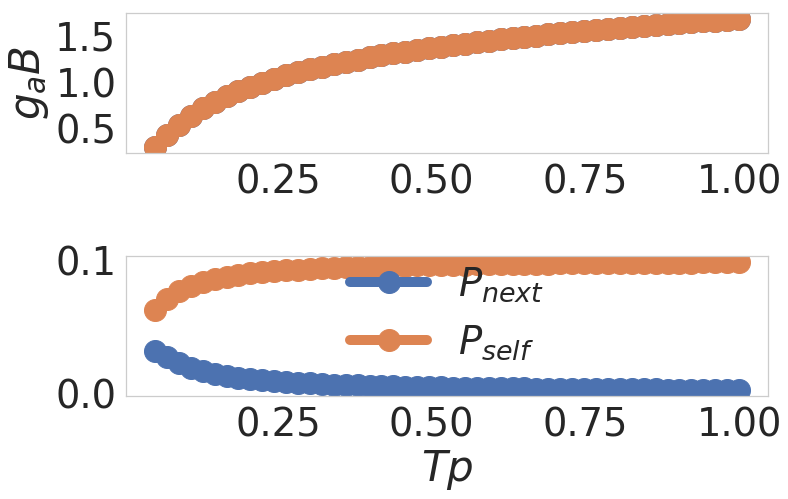

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(training_times, Bs, 'o-', lw=lw, ms=ms)
ax1.plot(training_times, B_aux, 'o-', lw=lw, ms=ms)


ax1.set_ylabel(r'$g_a B$')

ax2.plot(training_times, Pnext, 'o-', lw=lw, ms=ms, label=r'$P_{next}$')
ax2.plot(training_times, Pself, 'o-', lw=lw, ms=ms, label=r'$P_{self}$')
ax2.legend(frameon=False)

ax2.set_xlabel(r'$Tp$')
#ax2.set_ylim([0, 1])

fig.tight_layout()

In [33]:
ipis = np.linspace(0.050, 0.250)
Bs = np.zeros_like(ipis)
Pself = np.zeros_like(ipis)
Pnext = np.zeros_like(ipis)
training_time = 0.100

for index, ipi in enumerate(ipis):
    tt1 = training_time
    tt2 = training_time
    tt3 = training_time
    
    base_time = training_time
    ipi1 = ipi
    
    connectivity_dic = calculate_triad_connectivity(tt1, tt2, tt3, ipi1, ipi2, tau_z_pre, tau_z_post,  
                                                    base_time, base_ipi, resting_time, n_patterns)
    B = connectivity_dic['B21']
    p11 = connectivity_dic['p11']
    p21 = connectivity_dic['p21']
    Bs[index] = B
    Pself[index] = p11
    Pnext[index] = p21

B_aux = np.log10(Pself / Pnext)

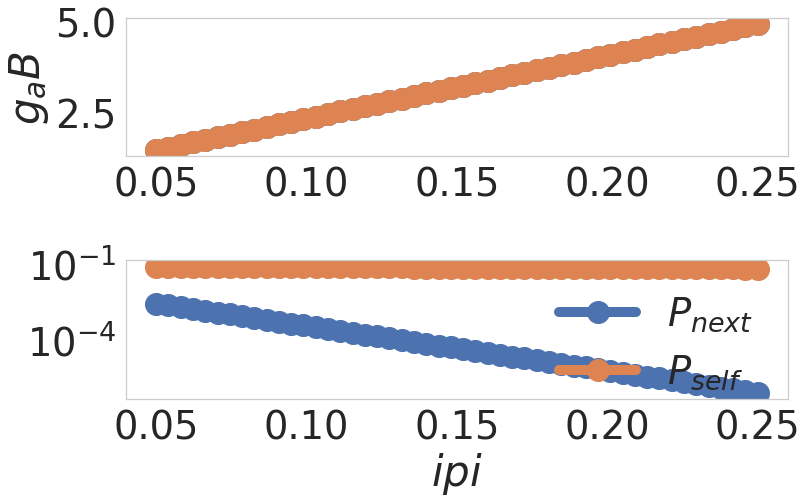

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
x_values = ipis

ax1.plot(x_values, Bs, 'o-', lw=lw, ms=ms)
ax1.plot(x_values, B_aux, 'o-', lw=lw, ms=ms)


ax1.set_ylabel(r'$g_a B$')

ax2.plot(x_values, Pnext, 'o-', lw=lw, ms=ms, label=r'$P_{next}$')
ax2.plot(x_values, Pself, 'o-', lw=lw, ms=ms, label=r'$P_{self}$')
ax2.set_yscale('log')
ax2.legend(frameon=False)

ax2.set_xlabel(r'$ipi$')
#ax2.set_ylim([0, 1])

fig.tight_layout()

In [40]:
p_min = 0.001 / 1
print(p_min)

0.001
